In [3]:
!pip install tensorflow==2.4.1 tensorflowflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install sklearn

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\admin\AppData\Local\Temp\pip-install-l7gtwqd6\sklearn_8aad4aca7a8f43feaecef3ad780f21cf\setup.py", line 10, in <module>
      LONG_DESCRIPTION = f.read()
    File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\encodings\cp1252.py", line 23, in decode
      return codecs.charmap_decode(input,self.errors,decoding_table)[0]
  UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7: character maps to <undefined>
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned a


  Using cached sklearn-0.0.post4.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install mediapipe --user

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install tensorflow-gpu --user

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\admin\AppData\Local\Temp\pip-install-412onqg3\tensorflow-gpu_b2b975b4e848452fa6c98f83295aa82e\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-

In [13]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [14]:
mp_holistic = mp.solutions.holistic #Holistic Model
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities

In [15]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSION BGR TO RGB
    image.flags.writeable = False #Image has to be no longer writeable
    results = model.process(image) #Making predictions
    image.flags.writeable = True #Makinng the image writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #COLOR CONVERSION RGB TO BGR
    return image, results



In [16]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)



In [17]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                                                                                mp_drawing.DrawingSpec(color=(80,250,10), thickness=1, circle_radius=1))
   
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS , mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
   
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                                                                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [18]:
cap = cv2.VideoCapture(0)
#Setting up mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    
    #Read Feed
    ret, frame = cap.read()
    
    #Making detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)

    #drawing landmarks
    draw_styled_landmarks(image, results)
    
    #Popping up the camera feed
    cv2.imshow('OpenCV feed', image)
    
    #Providing a key for quitting camera
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  cap.release()
  cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [31]:
cap.release()
cv2.destroyAllWindows()

In [19]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [20]:
face

NameError: name 'face' is not defined

In [21]:
results.left_hand_landmarks.landmark

AttributeError: 'NoneType' object has no attribute 'landmark'

In [22]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

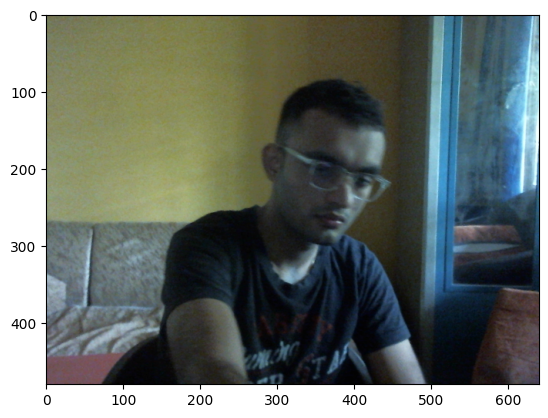

In [23]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [24]:
results

mediapipe.python.solution_base.SolutionOutputs

In [25]:
draw_styled_landmarks(frame, results)

In [26]:
results.pose_landmarks.landmark[0].visibility

0.9995473623275757

In [27]:
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [28]:
pose

[array([ 0.57896292,  0.4660818 , -0.50708061,  0.99954736]),
 array([ 0.60570514,  0.42152685, -0.45998883,  0.99917537]),
 array([ 0.61454785,  0.42483997, -0.46010309,  0.99911642]),
 array([ 0.62237501,  0.42830741, -0.46027249,  0.99909133]),
 array([ 0.56826997,  0.40652329, -0.50364077,  0.9994002 ]),
 array([ 0.55216616,  0.39872205, -0.50349945,  0.99947006]),
 array([ 0.5352782 ,  0.39141929, -0.50397092,  0.99950689]),
 array([ 0.61394292,  0.44444785, -0.13870788,  0.99885565]),
 array([ 0.50065821,  0.396189  , -0.34612101,  0.99964577]),
 array([ 0.57494265,  0.52724564, -0.38038403,  0.99951965]),
 array([ 0.53584433,  0.50849617, -0.43565732,  0.99976248]),
 array([0.62849396, 0.68995136, 0.07486014, 0.99854416]),
 array([ 0.32273027,  0.63861001, -0.32211149,  0.99936849]),
 array([0.7258212 , 0.99631381, 0.09729592, 0.45590517]),
 array([ 0.31704023,  0.98302335, -0.39309856,  0.6924479 ]),
 array([ 0.69210255,  1.15012741, -0.21318731,  0.26684836]),
 array([ 0.58571

In [29]:
len(pose)

33

In [30]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [35]:
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()  
else: 
    np.zeros(1404)

In [36]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [37]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
result_test = extract_keypoints(results)

In [39]:
result_test

array([ 0.57896292,  0.4660818 , -0.50708061, ...,  0.        ,
        0.        ,  0.        ])

In [40]:
np.zeros(21*3).shape

(63,)

In [41]:
np.save('0', result_test)

In [42]:
np.load('0.npy')

array([ 0.57896292,  0.4660818 , -0.50708061, ...,  0.        ,
        0.        ,  0.        ])

In [49]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'yes', 'no', 'please', 'goodbye', ''])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [50]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [51]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [52]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [40]:
cap.release()
cv2.destroyAllWindows()

In [53]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [54]:
label_map = {label:num for num, label in enumerate(actions)}

In [55]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [56]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [57]:
np.array(sequences).shape

(90, 30, 1662)

In [58]:
np.array(labels).shape

(90,)

In [59]:
X = np.array(sequences)

In [60]:
X.shape

(90, 30, 1662)

In [61]:
y = to_categorical(labels).astype(int)

In [62]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [64]:
y_test.shape

(5, 3)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [66]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [67]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [68]:
res = [.7, 0.2, 0.1]

In [69]:
actions[np.argmax(res)]

'hello'

In [70]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [71]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 125ms/step - loss: 5.1976 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.0592 - categorical_accuracy: 0.4118
Epoch 3/2000
3/3 [==============================] - 0s 126ms/step - loss: 2.4779 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.2001 - categorical_accuracy: 0.3529
Epoch 5/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0593 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.9964 - categorical_accuracy: 0.3529
Epoch 7/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.9572 - categorical_accuracy: 0.5059
Epoch 8/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9837 - categorical_accuracy: 0.4353
Epoch 9/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.1336 - categorical_accuracy:

3/3 [==============================] - 0s 122ms/step - loss: 0.8428 - categorical_accuracy: 0.5765
Epoch 146/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.8298 - categorical_accuracy: 0.6000
Epoch 147/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.8310 - categorical_accuracy: 0.6588
Epoch 148/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.8033 - categorical_accuracy: 0.6471
Epoch 149/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.7941 - categorical_accuracy: 0.6588
Epoch 150/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.7865 - categorical_accuracy: 0.6706
Epoch 151/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.7923 - categorical_accuracy: 0.6353
Epoch 152/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.8199 - categorical_accuracy: 0.6235
Epoch 153/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.8150 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.3009 - categorical_accuracy: 0.9059
Epoch 218/2000
3/3 [==============================] - 0s 169ms/step - loss: 0.2866 - categorical_accuracy: 0.8941
Epoch 219/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.2673 - categorical_accuracy: 0.8941
Epoch 220/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.2210 - categorical_accuracy: 0.9412
Epoch 221/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.2514 - categorical_accuracy: 0.9059
Epoch 222/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2006 - categorical_accuracy: 0.9294
Epoch 223/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.1658 - categorical_accuracy: 0.9529
Epoch 224/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.1385 - categorical_accuracy: 0.9647
Epoch 225/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.1754 - cat

Epoch 360/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.0727 - categorical_accuracy: 0.9765
Epoch 361/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0732 - categorical_accuracy: 0.9765
Epoch 362/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0669 - categorical_accuracy: 0.9765
Epoch 363/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0595 - categorical_accuracy: 0.9765
Epoch 364/2000
3/3 [==============================] - 0s 165ms/step - loss: 0.0537 - categorical_accuracy: 0.9882
Epoch 365/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0506 - categorical_accuracy: 0.9882
Epoch 366/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0506 - categorical_accuracy: 0.9765
Epoch 367/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0519 - categorical_accuracy: 0.9882
Epoch 368/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.0677 - cat

Epoch 503/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.1483 - categorical_accuracy: 0.9529
Epoch 504/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.0991 - categorical_accuracy: 0.9765
Epoch 505/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.1837 - categorical_accuracy: 0.9059
Epoch 506/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.1153 - categorical_accuracy: 0.9647
Epoch 507/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0913 - categorical_accuracy: 0.9647
Epoch 508/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0644 - categorical_accuracy: 0.9765
Epoch 509/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0705 - categorical_accuracy: 0.9882
Epoch 510/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0487 - categorical_accuracy: 0.9882
Epoch 511/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.1002 - cat

3/3 [==============================] - 0s 127ms/step - loss: 1.6685e-04 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.6191e-04 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.5707e-04 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.5770e-04 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.5194e-04 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 150ms/step - loss: 1.4900e-04 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.4843e-04 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.4565e-04 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 123ms/step - l

3/3 [==============================] - 0s 127ms/step - loss: 3.5267e-05 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 142ms/step - loss: 3.4895e-05 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.4602e-05 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.4428e-05 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 126ms/step - loss: 3.4099e-05 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.3866e-05 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.3572e-05 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 142ms/step - loss: 3.3367e-05 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 119ms/step - l

3/3 [==============================] - 0s 117ms/step - loss: 1.5047e-05 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 157ms/step - loss: 1.4972e-05 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.4886e-05 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.4794e-05 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.4724e-05 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.4637e-05 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 150ms/step - loss: 1.4564e-05 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.4493e-05 - categorical_accuracy: 1.0000
Epoch 927/2000
3/3 [==============================] - 0s 122ms/step - l

3/3 [==============================] - 0s 117ms/step - loss: 6.3570e-06 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.3121e-06 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.2925e-06 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.2617e-06 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.2252e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 121ms/step - loss: 6.1929e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 125ms/step - loss: 6.1607e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 116ms/step - loss: 6.1326e-06 - categorical_accuracy: 1.0000
Epoch 1065/2000
3/3 [==============================] - 0s 121ms/

Epoch 1126/2000
3/3 [==============================] - 0s 121ms/step - loss: 4.2731e-06 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 124ms/step - loss: 4.2437e-06 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 124ms/step - loss: 4.2072e-06 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 124ms/step - loss: 4.1806e-06 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 124ms/step - loss: 4.1624e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 120ms/step - loss: 4.1385e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 125ms/step - loss: 4.1105e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.0782e-06 - categorical_accuracy: 1.0000
Epoch 1134/2000
3/3 [===========================

Epoch 1263/2000
3/3 [==============================] - 0s 127ms/step - loss: 8.0360e-07 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 123ms/step - loss: 8.3586e-07 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 123ms/step - loss: 8.2183e-07 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 124ms/step - loss: 7.9379e-07 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 119ms/step - loss: 7.6293e-07 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 120ms/step - loss: 7.6153e-07 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 119ms/step - loss: 7.6854e-07 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 120ms/step - loss: 7.5452e-07 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [===========================

Epoch 1400/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.7909e-07 - categorical_accuracy: 1.0000
Epoch 1401/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.7909e-07 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.7628e-07 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 130ms/step - loss: 2.8189e-07 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 126ms/step - loss: 2.7628e-07 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 119ms/step - loss: 2.7348e-07 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 118ms/step - loss: 2.7488e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 118ms/step - loss: 2.7067e-07 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [===========================

Epoch 1537/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.5988e-07 - categorical_accuracy: 1.0000
Epoch 1538/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.6269e-07 - categorical_accuracy: 1.0000
Epoch 1539/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.6269e-07 - categorical_accuracy: 1.0000
Epoch 1540/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.5988e-07 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.5988e-07 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.5988e-07 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.6128e-07 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.5567e-07 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [===========================

Epoch 1674/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.0098e-07 - categorical_accuracy: 1.0000
Epoch 1675/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0098e-07 - categorical_accuracy: 1.0000
Epoch 1676/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0378e-07 - categorical_accuracy: 1.0000
Epoch 1677/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.0238e-07 - categorical_accuracy: 1.0000
Epoch 1678/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.0238e-07 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0098e-07 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.0098e-07 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0098e-07 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [===========================

Epoch 1811/2000
3/3 [==============================] - 0s 137ms/step - loss: 6.7318e-08 - categorical_accuracy: 1.0000
Epoch 1812/2000
3/3 [==============================] - 0s 135ms/step - loss: 6.7318e-08 - categorical_accuracy: 1.0000
Epoch 1813/2000
3/3 [==============================] - 1s 221ms/step - loss: 6.7318e-08 - categorical_accuracy: 1.0000
Epoch 1814/2000
3/3 [==============================] - 1s 250ms/step - loss: 6.7318e-08 - categorical_accuracy: 1.0000
Epoch 1815/2000
3/3 [==============================] - 1s 218ms/step - loss: 6.4513e-08 - categorical_accuracy: 1.0000
Epoch 1816/2000
3/3 [==============================] - 1s 389ms/step - loss: 6.7318e-08 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 134ms/step - loss: 6.5916e-08 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 150ms/step - loss: 6.4513e-08 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [===========================

Epoch 1948/2000
3/3 [==============================] - 0s 126ms/step - loss: 4.2074e-08 - categorical_accuracy: 1.0000
Epoch 1949/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1950/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1951/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1952/2000
3/3 [==============================] - 0s 123ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.2074e-08 - categorical_accuracy: 1.0000
Epoch 1954/2000
3/3 [==============================] - 0s 121ms/step - loss: 4.2074e-08 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 142ms/step - loss: 4.3476e-08 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [===========================

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [73]:
res = model.predict(X_test)

1/1 [==============================] - 0s 433ms/step


In [74]:
actions[np.argmax(res[4])]

'iloveyou'

In [75]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [76]:
model.save('action.h5')

In [85]:
#del model #do not run

NameError: name 'model' is not defined

In [77]:
model.load_weights('action.h5')

In [78]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [79]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 36ms/step


In [80]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [81]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [82]:
accuracy_score(ytrue, yhat)

1.0

In [83]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [106]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [84]:
len(sequences)

90

In [85]:
sequences.append('def')

In [86]:
sequences.reverse()

In [87]:
sequences[-30:]

[[array([ 0.41674128,  0.43995234, -0.87110555, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.41692537,  0.43580303, -0.89335078, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.41844064,  0.43568975, -0.87821132, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42289853,  0.43659785, -0.78977829, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42571974,  0.43805188, -0.79414034, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42705002,  0.44058692, -0.75269812, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42895737,  0.44265896, -0.86297798, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42890206,  0.44419056, -0.81165206, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.42928845,  0.44598538, -0.7613461 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.43107733,  0.44704324, -0.77256888, ...,  0.        ,
       

In [93]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
           # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.pyth